In [8]:
#import necessary libraries
import numpy as np
import pandas as pd
from pprint import pprint
import re
import matplotlib.pyplot as plt
import nltk; nltk.download('stopwords')

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /home/centos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
# spacy for text processing
import spacy

#Gensim to build LDA
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim 

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(["thing","became","use","comcast","week","hour","month","year","day","time","minute"])

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
#Read file location from console
folder_name = input("Enter folder name(Should contain the inputfile i.e labelled with sentiments):")
file_name = input("Enter file name:")
folder_name.strip()
folder_name.strip("/")
full_filename = folder_name+"/"+ file_name

#Read Customer tweets and complaints labelled with sentiments - input file
twitter_sentiment_df_old = pd.read_csv(full_filename, error_bad_lines=False, encoding='utf-8')


/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Enter folder name(Should contain the inputfile i.e labelled with sentiments):/dev/python-analytics/POC-Tigo-twitter-analysis_v2/Datasets
Enter file name:ATnT_Tweets_sentiment_output.csv


In [17]:
twitter_sentiment_df_old.head()

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,User,Alias,Followers,Date,Tweet,Permalink,Retweet count,Likes count,Tweet value,Language,Bio Location,Latitude,Longitude,Country code,Parsed location,Sentiment Score,Customer sentiment / tone
0,Tim McCutcheon,goldenhorngate,1.0,Thu 07 Jan 2021 16:49:17 GMT,@ATTNEWS @ATT Are you going to continue to fun...,https://twitter.com/user/show/el/1347223795736...,NaN,NaN,NaN,English,NaN,NaN,NaN,NaN,NaN,0.1440,positive
1,Hopefulbond,hopefulbond,131.0,Thu 07 Jan 2021 16:47:59 GMT,@ATTHelp when it’s time to pay the bill your r...,https://twitter.com/user/show/el/1347223467234...,NaN,NaN,0.08,English,NaN,NaN,NaN,NaN,NaN,0.1351,positive
2,Nitro,Baja9Blast,5.0,Thu 07 Jan 2021 16:47:46 GMT,@ATTHelp Could you please explain the differen...,https://twitter.com/user/show/el/1347223413199...,NaN,NaN,NaN,English,Wisconsin,NaN,NaN,NaN,NaN,0.6369,positive
3,Allison Koons,AllisonKoons1,206.0,Thu 07 Jan 2021 16:45:57 GMT,@ATTHelp How do I order a landline? I’ve tried...,https://twitter.com/user/show/el/1347222953700...,NaN,NaN,0.14,English,NaN,NaN,NaN,NaN,NaN,0.0000,neutral
4,hacked at 35k 🤣,__jwash,880.0,Thu 07 Jan 2021 16:41:33 GMT,@ATT @ATTHelp I keep getting spam SMS messages...,https://twitter.com/user/show/el/1347221849269...,NaN,NaN,0.50,English,Ridgeland MS,NaN,NaN,NaN,NaN,-0.5719,negative


In [18]:
twitter_sentiment_df_old.count()

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


User                         869551
Alias                        869616
Followers                    861328
Date                         869620
Tweet                        869620
Permalink                    869620
Retweet count                 78179
Likes count                  227183
Tweet value                  840078
Language                     869620
Bio Location                 567892
Latitude                          0
Longitude                         0
Country code                      0
Parsed location                   0
Sentiment Score              869620
Customer sentiment / tone    869620
dtype: int64

In [19]:
twitter_sentiment_df=twitter_sentiment_df_old[:99999]

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
twitter_sentiment_df.count()

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


User                         99988
Alias                        99996
Followers                    98370
Date                         99999
Tweet                        99999
Permalink                    99999
Retweet count                 8156
Likes count                  31513
Tweet value                  94380
Language                     99999
Bio Location                 64228
Latitude                         0
Longitude                        0
Country code                     0
Parsed location                  0
Sentiment Score              99999
Customer sentiment / tone    99999
dtype: int64

In [21]:
def process_twitter_text(data):
    data=[re.sub(r'&[A-Za-z0-9]+','',text) for text in data]
    data=[re.sub(r'@[A-Za-z0-9]+','',text) for text in data]
    data=[re.sub('https?://[A-Za-z0-9./]+','',text) for text in data]
    data=[re.sub('[^A-Za-z0-9 ]+', '', text) for text in data]
    data=[re.sub('https?://[A-Za-z0-9./]+','',text) for text in data]
    data=[re.sub(' +', ' ', text) for text in data]
    data=[text.lower() for text in data]
    return data

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
# Convert to list
data = twitter_sentiment_df.Tweet.values.tolist()
data_proc=process_twitter_text(data)
twitter_sentiment_df['tweet_processed']=data_proc

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/centos/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [23]:
twitter_sentiment_df[['Tweet','tweet_processed','Sentiment Score','Customer sentiment / tone']][:20]

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Tweet,tweet_processed,Sentiment Score,Customer sentiment / tone
0,@ATTNEWS @ATT Are you going to continue to fun...,are you going to continue to fund ted cruz if...,0.1440,positive
1,@ATTHelp when it’s time to pay the bill your r...,when its time to pay the bill your right on t...,0.1351,positive
2,@ATTHelp Could you please explain the differen...,could you please explain the difference betwe...,0.6369,positive
3,@ATTHelp How do I order a landline? I’ve tried...,how do i order a landline ive tried calling y...,0.0000,neutral
4,@ATT @ATTHelp I keep getting spam SMS messages...,i keep getting spam sms messages via an email...,-0.5719,negative
5,@ATTNEWS @ATT What about the riots all through...,what about the riots all through last year an...,-0.7579,negative
6,@ATTNEWS @BizRoundtable You should suspend all...,you should suspend all political contribution...,-0.3182,negative
7,@ATTHelp hello can you help me?,hello can you help me,0.4019,positive
8,@ATTNEWS @ATT Good. But forewarning Project Li...,good but forewarning project lincoln is targe...,0.4404,positive
9,RT @Cybersecinsider: What is a software-define...,rt what is a softwaredefined perimeter and how...,0.0000,neutral


In [24]:
# Convert to list
data = twitter_sentiment_df.tweet_processed.values.tolist()

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
data[:20]

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[' are you going to continue to fund ted cruz if so this is pretty meaningless',
 ' when its time to pay the bill your right on time but anything else i get absolutely no help',
 ' could you please explain the difference between u300 all in and u300 latino all in is there a price difference i was not told of this change thanks',
 ' how do i order a landline ive tried calling you but busy signal',
 ' i keep getting spam sms messages via an email address from sender along with 20 other people at a time how can i report and stop without having to black 20 numbers each time i get the text happens at least 3 times a day for over a month now ',
 ' what about the riots all through last year any words for the businesses destroyed',
 ' you should suspend all political contributions to members of the seditioncaucus',
 ' hello can you help me',
 ' good but forewarning project lincoln is targeting corps making gop donations ',
 'rt what is a softwaredefined perimeter and how does sdp work source c

In [26]:
#Pre-processing using regex
#Remove special characters
data = [text.lower() for text in data]
data = [re.sub('[^A-Za-z0-9 ]+', ' ', text) for text in data]
# Remove single quotes
data = [re.sub("\'", "", text) for text in data]

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
pprint(data[:3])

[' are you going to continue to fund ted cruz if so this is pretty meaningless',
 ' when its time to pay the bill your right on time but anything else i get '
 'absolutely no help',
 ' could you please explain the difference between u300 all in and u300 latino '
 'all in is there a price difference i was not told of this change thanks']


/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
#Tokenize and pre-process using gensim
def text_to_words(text):
    for sentence in text:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_tokens = list(text_to_words(data))

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
data_tokens[:3]

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['are',
  'you',
  'going',
  'to',
  'continue',
  'to',
  'fund',
  'ted',
  'cruz',
  'if',
  'so',
  'this',
  'is',
  'pretty',
  'meaningless'],
 ['when',
  'its',
  'time',
  'to',
  'pay',
  'the',
  'bill',
  'your',
  'right',
  'on',
  'time',
  'but',
  'anything',
  'else',
  'get',
  'absolutely',
  'no',
  'help'],
 ['could',
  'you',
  'please',
  'explain',
  'the',
  'difference',
  'between',
  'all',
  'in',
  'and',
  'latino',
  'all',
  'in',
  'is',
  'there',
  'price',
  'difference',
  'was',
  'not',
  'told',
  'of',
  'this',
  'change',
  'thanks']]

In [30]:
# Build the bigram model with list of tokens
bigram = gensim.models.Phrases(data_tokens, min_count=5, threshold=50) # higher threshold fewer phrases.
bigram_model = gensim.models.phrases.Phraser(bigram)

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
# See bigram example
print([bigram_model[data_tokens[2]]])

[['could', 'you', 'please', 'explain', 'the', 'difference_between', 'all', 'in', 'and', 'latino', 'all', 'in', 'is', 'there', 'price', 'difference', 'was', 'not', 'told', 'of', 'this', 'change', 'thanks']]


/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
# Define function to remove stopwords
def remove_stopwords(data):
    return [[word for word in simple_preprocess(str(text)) if word not in stop_words] for text in data]

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
#Function to build bigrams
def build_bigrams(data):
    return [bigram_model[text] for text in data]

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
#Perform lemmatization using spaCy
def spacy_lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
# Remove Stop Words
data_tokens_nostops = remove_stopwords(data_tokens)

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
data_tokens_nostops

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['going', 'continue', 'fund', 'ted', 'cruz', 'pretty', 'meaningless'],
 ['pay', 'bill', 'right', 'anything', 'else', 'get', 'absolutely', 'help'],
 ['could',
  'please',
  'explain',
  'difference',
  'latino',
  'price',
  'difference',
  'told',
  'change',
  'thanks'],
 ['order', 'landline', 'ive', 'tried', 'calling', 'busy', 'signal'],
 ['keep',
  'getting',
  'spam',
  'sms',
  'messages',
  'via',
  'email',
  'address',
  'sender',
  'along',
  'people',
  'report',
  'stop',
  'without',
  'black',
  'numbers',
  'get',
  'text',
  'happens',
  'least',
  'times'],
 ['riots', 'last', 'words', 'businesses', 'destroyed'],
 ['suspend', 'political', 'contributions', 'members', 'seditioncaucus'],
 ['hello', 'help'],
 ['good',
  'forewarning',
  'project',
  'lincoln',
  'targeting',
  'corps',
  'making',
  'gop',
  'donations'],
 ['rt',
  'softwaredefined',
  'perimeter',
  'sdp',
  'work',
  'source',
  'cybersecurity',
  'technology'],
 ['done',
  'look',
  'forward',
  'hearing

In [37]:
# Build Bigrams
data_tokens_bigrams = build_bigrams(data_tokens_nostops)

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
nlp = spacy.load('en', disable=['parser', 'ner'])
#import spacy
#nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
lemmatized_tokens = spacy_lemmatization(data_tokens_bigrams, allowed_postags=['NOUN', 'ADJ', 'ADV'])
#data_lemmatized = spacy_lemmatization(data_tokens_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
lemmatized_tokens

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['fund', 'pretty', 'meaningless'],
 ['bill', 'right', 'else', 'absolutely', 'help'],
 ['difference', 'latino', 'price', 'difference', 'change', 'thank'],
 ['order'],
 ['spam',
  'sms_message',
  'sender',
  'people',
  'stop',
  'black',
  'number',
  'text',
  'least',
  'time'],
 ['riot', 'last', 'word', 'business'],
 ['member'],
 [],
 ['good', 'forewarning', 'corp', 'donation'],
 ['perimeter', 'work', 'technology'],
 ['forward', 'company', 'way', 'way'],
 ['message'],
 ['big', 'datum', 'sensorsiot'],
 ['calm', 'covid_storm', 'cybersecurity_technology'],
 ['department', 'min', 'help', 'amount'],
 ['calm', 'covid_storm', 'cybersecurity_technology'],
 ['calm', 'covid_storm', 'cybersecurity_technology'],
 ['calm', 'covid_storm', 'cybersecurity_technology'],
 ['calm', 'cybersecurity_technology'],
 ['person', 'card', 'arrangement', 'still', 'phone', 'pandemic'],
 ['impact', 'community', 'future'],
 ['less',
  'hour',
  'already',
  'sorry',
  'incorrectly',
  'equipment',
  'decade',
  '

In [48]:
# Remove Stop Words
data_lemmatized_nostop = remove_stopwords(lemmatized_tokens)

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
len(data_lemmatized_nostop)

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


99999

In [50]:
#Remove empty document after performing lemmatization and stopword removal
data_lemmatized = [x if x != [] else ['default'] for x in data_lemmatized_nostop ]

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
data_lemmatized

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['fund', 'pretty', 'meaningless'],
 ['bill', 'right', 'else', 'absolutely', 'help'],
 ['difference', 'latino', 'price', 'difference', 'change', 'thank'],
 ['order'],
 ['spam',
  'sms_message',
  'sender',
  'people',
  'stop',
  'black',
  'number',
  'text',
  'least'],
 ['riot', 'last', 'word', 'business'],
 ['member'],
 ['default'],
 ['good', 'forewarning', 'corp', 'donation'],
 ['perimeter', 'work', 'technology'],
 ['forward', 'company', 'way', 'way'],
 ['message'],
 ['big', 'datum', 'sensorsiot'],
 ['calm', 'covid_storm'],
 ['department', 'min', 'help', 'amount'],
 ['calm', 'covid_storm'],
 ['calm', 'covid_storm'],
 ['calm', 'covid_storm'],
 ['calm'],
 ['person', 'card', 'arrangement', 'still', 'phone', 'pandemic'],
 ['impact', 'community', 'future'],
 ['less',
  'already',
  'sorry',
  'incorrectly',
  'equipment',
  'decade',
  'remote',
  'dark',
  'voice',
  'control'],
 ['locked', 'cell', 'phone', 'space', 'greyebay'],
 ['att', 'phone', 'service'],
 ['schoolchoice'],
 ['phon

In [52]:
len(data_lemmatized)

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


99999

In [53]:
# Create Dictionary using gensim.corpora
dictionary = corpora.Dictionary(data_lemmatized)

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
# Create Corpus using Bag of words
corpus = [dictionary.doc2bow(text) for text in data_lemmatized]

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
corpus

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[(0, 1), (1, 1), (2, 1)],
 [(3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
 [(8, 1), (9, 2), (10, 1), (11, 1), (12, 1)],
 [(13, 1)],
 [(14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1)],
 [(23, 1), (24, 1), (25, 1), (26, 1)],
 [(27, 1)],
 [(28, 1)],
 [(29, 1), (30, 1), (31, 1), (32, 1)],
 [(33, 1), (34, 1), (35, 1)],
 [(36, 1), (37, 1), (38, 2)],
 [(39, 1)],
 [(40, 1), (41, 1), (42, 1)],
 [(43, 1), (44, 1)],
 [(6, 1), (45, 1), (46, 1), (47, 1)],
 [(43, 1), (44, 1)],
 [(43, 1), (44, 1)],
 [(43, 1), (44, 1)],
 [(43, 1)],
 [(48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1)],
 [(54, 1), (55, 1), (56, 1)],
 [(57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1)],
 [(52, 1), (67, 1), (68, 1), (69, 1), (70, 1)],
 [(52, 1), (71, 1), (72, 1)],
 [(73, 1)],
 [(52, 1), (74, 1)],
 [(50, 1),
  (52, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 2),
  (81, 1),
  (82, 1),
  (83, 1)],
 [(

In [56]:
#print corpus
[[(dictionary[id], freq) for id, freq in cp] for cp in corpus]

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[('fund', 1), ('meaningless', 1), ('pretty', 1)],
 [('absolutely', 1), ('bill', 1), ('else', 1), ('help', 1), ('right', 1)],
 [('change', 1), ('difference', 2), ('latino', 1), ('price', 1), ('thank', 1)],
 [('order', 1)],
 [('black', 1),
  ('least', 1),
  ('number', 1),
  ('people', 1),
  ('sender', 1),
  ('sms_message', 1),
  ('spam', 1),
  ('stop', 1),
  ('text', 1)],
 [('business', 1), ('last', 1), ('riot', 1), ('word', 1)],
 [('member', 1)],
 [('default', 1)],
 [('corp', 1), ('donation', 1), ('forewarning', 1), ('good', 1)],
 [('perimeter', 1), ('technology', 1), ('work', 1)],
 [('company', 1), ('forward', 1), ('way', 2)],
 [('message', 1)],
 [('big', 1), ('datum', 1), ('sensorsiot', 1)],
 [('calm', 1), ('covid_storm', 1)],
 [('help', 1), ('amount', 1), ('department', 1), ('min', 1)],
 [('calm', 1), ('covid_storm', 1)],
 [('calm', 1), ('covid_storm', 1)],
 [('calm', 1), ('covid_storm', 1)],
 [('calm', 1)],
 [('arrangement', 1),
  ('card', 1),
  ('pandemic', 1),
  ('person', 1),
  

In [57]:
# Build LDA model using gensim with number of topics = 5
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
# Print each topic and corresponding keywords
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.057*"local" + 0.049*"att" + 0.034*"frustration" + 0.031*"much" + '
  '0.031*"viewing_option" + 0.027*"today" + 0.023*"next" + 0.023*"watch" + '
  '0.023*"also" + 0.022*"way"'),
 (1,
  '0.143*"phone" + 0.081*"customer" + 0.033*"new" + 0.026*"issue" + '
  '0.025*"share" + 0.025*"let" + 0.022*"bad" + 0.019*"company" + 0.018*"movie" '
  '+ 0.017*"money"'),
 (2,
  '0.083*"service" + 0.036*"well" + 0.027*"work" + 0.026*"patience" + '
  '0.019*"need" + 0.018*"film" + 0.018*"already" + 0.018*"never" + '
  '0.018*"help" + 0.016*"right"'),
 (3,
  '0.100*"channel" + 0.061*"negotiation" + 0.044*"sweepstake" + '
  '0.028*"internet" + 0.025*"even" + 0.024*"good" + 0.023*"still" + '
  '0.015*"joker" + 0.015*"home" + 0.013*"thank"'),
 (4,
  '0.077*"default" + 0.063*"back" + 0.050*"viewer" + 0.049*"soon" + '
  '0.033*"possible" + 0.030*"station" + 0.027*"info" + 0.023*"people" + '
  '0.021*"tv" + 0.015*"information"')]


/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
#LDA evaluation
#Perplexity
print('Perplexity: ', lda_model.log_perplexity(corpus)) 

#Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_score)

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Perplexity:  -8.214486839099397

Coherence Score:  0.3664354626586677


In [49]:
#!pip3.7 install -U pyLDAvis

Defaulting to user installation because normal site-packages is not writeable


In [60]:
# Visualize the topics
pyLDAvis.enable_notebook()
visualize_LDA = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
visualize_LDA

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.389474  0.044838       1        1  27.183344
3     -0.058742 -0.373765       2        1  21.834641
2     -0.116020  0.150249       3        1  19.921037
1     -0.143337  0.128317       4        1  18.270073
0     -0.071375  0.050360       5        1  12.790904, topic_info=                 Term          Freq         Total Category  logprob  loglift
52              phone  11992.000000  11992.000000  Default  30.0000  30.0000
1864          channel  10029.000000  10029.000000  Default  29.0000  29.0000
28            default   9628.000000   9628.000000  Default  28.0000  28.0000
72            service   7631.000000   7631.000000  Default  27.0000  27.0000
115          customer   6782.000000   6782.000000  Default  26.0000  26.0000
...               ...           ...           ...      ...      ...      ...
3332       edgetoedge    353.085987    353.881079   Topic5  -5.1149   2.0542
93             iphone    357.183079    357.995862   Topic5  -5.1034   2.0542
13757  viewing_option   1813.651510   1831.783345   Topic5  -3.4786   2.0465
12815           tegna    658.012208    704.301249   Topic5  -4.4924   1.9885
14882     uncertainty    373.659731    604.849186   Topic5  -5.0583   1.5748

[188 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
179       1  0.998948      able
306       3  0.999543   account
121       2  0.999519  actually
160       4  0.998804    almost
57        3  0.999749   already
...     ...       ...       ...
132       3  0.999802      well
120       3  0.999459  wireless
35        3  0.999584      work
83        1  0.999407     world
165       4  0.998835       yet

[180 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 3, 2, 1])

In [64]:
#Save Optimal LDA model
lda_model.save('/opt/cloudera/Code_dump/Code/Att_tweets_first_lda.model')

#Save Dictionary
dictionary.save('/opt/cloudera/Code_dump/Code/Att_tweets_first_lda_dict.dic')

#save n-gram phrases
bigram_model.save('/opt/cloudera/Code_dump/Code/Att_tweets_first_lda_bigrams')

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
import pickle

with open("/opt/cloudera/Code_dump/Code/Att_tweets_corpus.txt", "wb") as fp:
    pickle.dump(corpus, fp)

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
#Find optimal number of topics
def LDA_model_coherence_values(dictionary, corpus, texts, limit, start=1, step=2):
    coherence_values = []
    models_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        models_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return models_list, coherence_values

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [70]:
models_list, coherence_values = LDA_model_coherence_values(dictionary=dictionary, corpus=corpus, texts=data_lemmatized, start=3, limit=30, step=3)

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


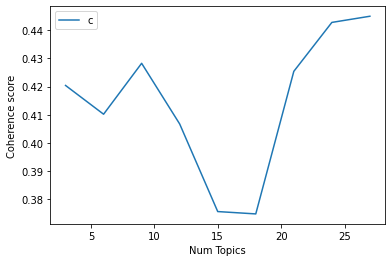

In [71]:
#Plot graph
limit=30; start=3; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [72]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num of Topics =", m, " has Coherence Value of", round(cv, 4))

Num of Topics = 3  has Coherence Value of 0.4204
Num of Topics = 6  has Coherence Value of 0.4102
Num of Topics = 9  has Coherence Value of 0.4282
Num of Topics = 12  has Coherence Value of 0.4067
Num of Topics = 15  has Coherence Value of 0.3757
Num of Topics = 18  has Coherence Value of 0.3749
Num of Topics = 21  has Coherence Value of 0.4254
Num of Topics = 24  has Coherence Value of 0.4427
Num of Topics = 27  has Coherence Value of 0.4449


/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [77]:
#Optimal model with number of Topics = 13 
# Select the model and print the topics
optimal_model = models_list[2]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.181*"viewer" + 0.071*"att" + 0.067*"good" + 0.049*"frustration" + '
  '0.046*"much" + 0.045*"viewing_option" + 0.040*"today" + 0.032*"way" + '
  '0.031*"app" + 0.031*"cut"'),
 (1,
  '0.060*"even" + 0.049*"issue" + 0.047*"share" + 0.041*"bad" + 0.034*"movie" '
  '+ 0.028*"game" + 0.024*"ever" + 0.022*"pandemic" + 0.021*"public" + '
  '0.021*"many"'),
 (2,
  '0.141*"phone" + 0.086*"service" + 0.080*"customer" + 0.029*"still" + '
  '0.026*"patience" + 0.018*"help" + 0.017*"right" + 0.016*"deal" + '
  '0.015*"account" + 0.015*"bill"'),
 (3,
  '0.082*"possible" + 0.075*"station" + 0.056*"internet" + 0.052*"new" + '
  '0.044*"work" + 0.031*"need" + 0.030*"already" + 0.030*"home" + '
  '0.023*"experience" + 0.018*"together"'),
 (4,
  '0.184*"back" + 0.078*"info" + 0.067*"people" + 0.045*"information" + '
  '0.038*"law_tegna" + 0.032*"money" + 0.028*"next" + 0.023*"yet" + '
  '0.023*"area" + 0.020*"sure"'),
 (5,
  '0.068*"really" + 0.057*"never" + 0.050*"guy" + 0.044*"support" + '
  

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [78]:
# Visualize the topics for optimal LDA model
pyLDAvis.enable_notebook()
visualize_LDA = pyLDAvis.gensim.prepare(optimal_model, corpus, dictionary)
visualize_LDA

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.408719  0.074969       1        1  19.557405
6     -0.105424 -0.130078       2        1  17.370554
3      0.080815  0.291410       3        1  11.419781
1      0.014697 -0.159470       4        1  10.491920
7      0.055697 -0.165665       5        1   9.583850
4      0.078279  0.224721       6        1   9.583541
0      0.102421 -0.048750       7        1   8.698280
5      0.084097 -0.064217       8        1   6.850033
8      0.098137 -0.022920       9        1   6.444636, topic_info=            Term          Freq         Total Category  logprob  loglift
1864     channel  10012.000000  10012.000000  Default  30.0000  30.0000
52         phone  12643.000000  12643.000000  Default  29.0000  29.0000
243         back   8113.000000   8113.000000  Default  28.0000  28.0000
28       default  10529.000000  10529.000000  Default  27.0000  27.0000
1581      viewer   7235.000000   7235.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
1042    director    191.909977    192.826969   Topic9  -5.0391   2.7372
1084     process    191.883068    192.800547   Topic9  -5.0393   2.7372
870    unlimited    190.025736    190.942877   Topic9  -5.0490   2.7371
810       tablet    209.237121    210.260278   Topic9  -4.9527   2.7370
12818  nice_ring    245.276671    249.754187   Topic9  -4.7938   2.7238

[319 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
179       2  0.998738       able
157       2  0.998099     access
306       1  0.999682    account
121       9  0.998485   actually
947       7  0.996611         ad
...     ...       ...        ...
35        3  0.999399       work
83        2  0.999570      world
356       3  0.998466      wrong
113       8  0.996861  yesterday
165       6  0.999334        yet

[353 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 7, 4, 2, 8, 5, 1, 6, 9])

In [79]:
#Dominant topic in each document
def top_topic_in_document(ldamodel=lda_model, corpus=corpus):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0: # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num)+1, round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    # combine with original dataset
    #contents = pd.Series(texts)
    sent_topics_df_new = pd.concat([twitter_sentiment_df, sent_topics_df], axis=1)
    return(sent_topics_df_new)

top_topic_docs = top_topic_in_document(ldamodel=optimal_model, corpus=corpus)

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [80]:
top_topic_docs

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,User,Alias,Followers,Date,Tweet,Permalink,Retweet count,Likes count,Tweet value,Language,...,Latitude,Longitude,Country code,Parsed location,Sentiment Score,Customer sentiment / tone,tweet_processed,Dominant_Topic,Perc_Contribution,Topic_Keywords
0,Tim McCutcheon,goldenhorngate,1.0,Thu 07 Jan 2021 16:49:17 GMT,@ATTNEWS @ATT Are you going to continue to fun...,https://twitter.com/user/show/el/1347223795736...,NaN,NaN,NaN,English,...,NaN,NaN,NaN,NaN,0.1440,positive,are you going to continue to fund ted cruz if...,4.0,0.1994,"possible, station, internet, new, work, need, ..."
1,Hopefulbond,hopefulbond,131.0,Thu 07 Jan 2021 16:47:59 GMT,@ATTHelp when it’s time to pay the bill your r...,https://twitter.com/user/show/el/1347223467234...,NaN,NaN,0.08,English,...,NaN,NaN,NaN,NaN,0.1351,positive,when its time to pay the bill your right on t...,3.0,0.3576,"phone, service, customer, still, patience, hel..."
2,Nitro,Baja9Blast,5.0,Thu 07 Jan 2021 16:47:46 GMT,@ATTHelp Could you please explain the differen...,https://twitter.com/user/show/el/1347223413199...,NaN,NaN,NaN,English,...,NaN,NaN,NaN,NaN,0.6369,positive,could you please explain the difference betwe...,8.0,0.2879,"channel, negotiation, let, thank, watch, also,..."
3,Allison Koons,AllisonKoons1,206.0,Thu 07 Jan 2021 16:45:57 GMT,@ATTHelp How do I order a landline? I’ve tried...,https://twitter.com/user/show/el/1347222953700...,NaN,NaN,0.14,English,...,NaN,NaN,NaN,NaN,0.0000,neutral,how do i order a landline ive tried calling y...,3.0,0.1755,"phone, service, customer, still, patience, hel..."
4,hacked at 35k 🤣,__jwash,880.0,Thu 07 Jan 2021 16:41:33 GMT,@ATT @ATTHelp I keep getting spam SMS messages...,https://twitter.com/user/show/el/1347221849269...,NaN,NaN,0.50,English,...,NaN,NaN,NaN,NaN,-0.5719,negative,i keep getting spam sms messages via an email...,5.0,0.2635,"back, info, people, information, law_tegna, mo..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,+ كاش,nadiaskin1,180.0,Sat 05 Dec 2020 00:03:35 GMT,@DharmaForSale @debtanchor1 @JoAnnKennedyCAN @...,https://twitter.com/user/show/el/1335011901500...,NaN,NaN,0.10,English,...,NaN,NaN,NaN,NaN,-0.1449,negative,fraud pd jamiedimon tx king dvqdqc dc v dc dc...,3.0,0.1848,"phone, service, customer, still, patience, hel..."
99995,Olivia Atkinson,oma092,2.0,Sat 05 Dec 2020 00:03:25 GMT,@ATTexplore @butterfly917x a phone to flip fo...,https://twitter.com/user/show/el/1335011858537...,NaN,2.0,NaN,English,...,NaN,NaN,NaN,NaN,0.0000,neutral,a phone to flip for galaxyzflip attexplore sw...,3.0,0.2155,"phone, service, customer, still, patience, hel..."
99996,Alan,alan_destiny,22.0,Sat 05 Dec 2020 00:03:09 GMT,@ATTexplore @mmotioncitycutie“a phone to flip ...,https://twitter.com/user/show/el/1335011791265...,NaN,1.0,0.01,English,...,NaN,NaN,NaN,NaN,0.0000,neutral,a phone to flip forgalaxyzflip attexplore swe...,3.0,0.2265,"phone, service, customer, still, patience, hel..."
99997,Justice For Sale?,DharmaForSale,166.0,Sat 05 Dec 2020 00:03:07 GMT,RT @DharmaForSale: @nadiaskin1 @debtanchor1 @J...,https://twitter.com/user/show/el/1335011783032...,NaN,NaN,0.23,English,...,NaN,NaN,NaN,NaN,-0.7184,negative,rt fraud pd jamiedimon tx c jamiedimon brian o...,4.0,0.2049,"possible, station, internet, new, work, need, ..."


In [81]:
# Format
df_dominant_topic = top_topic_docs.reset_index()
df_dominant_topic.drop('tweet_processed', axis=1, inplace=True)
#df_dominant_topic.columns = ['Document No', 'Text','Sentiment Score','Customer sentiment / tone', 'Dominant Topic', 'Topic Percentage Contribution', 'Keywords']

#Write Dominant topic in each document
df_dominant_topic.to_csv("/dev/python-analytics/POC-Tigo-twitter-analysis_v2/Datasets/output/Att_Twitter_topic_modelling_output_100k.csv",index=False)
# Show
df_dominant_topic.head()

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index,User,Alias,Followers,Date,Tweet,Permalink,Retweet count,Likes count,Tweet value,...,Bio Location,Latitude,Longitude,Country code,Parsed location,Sentiment Score,Customer sentiment / tone,Dominant_Topic,Perc_Contribution,Topic_Keywords
0,0,Tim McCutcheon,goldenhorngate,1.0,Thu 07 Jan 2021 16:49:17 GMT,@ATTNEWS @ATT Are you going to continue to fun...,https://twitter.com/user/show/el/1347223795736...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.1440,positive,4.0,0.1994,"possible, station, internet, new, work, need, ..."
1,1,Hopefulbond,hopefulbond,131.0,Thu 07 Jan 2021 16:47:59 GMT,@ATTHelp when it’s time to pay the bill your r...,https://twitter.com/user/show/el/1347223467234...,NaN,NaN,0.08,...,NaN,NaN,NaN,NaN,NaN,0.1351,positive,3.0,0.3576,"phone, service, customer, still, patience, hel..."
2,2,Nitro,Baja9Blast,5.0,Thu 07 Jan 2021 16:47:46 GMT,@ATTHelp Could you please explain the differen...,https://twitter.com/user/show/el/1347223413199...,NaN,NaN,NaN,...,Wisconsin,NaN,NaN,NaN,NaN,0.6369,positive,8.0,0.2879,"channel, negotiation, let, thank, watch, also,..."
3,3,Allison Koons,AllisonKoons1,206.0,Thu 07 Jan 2021 16:45:57 GMT,@ATTHelp How do I order a landline? I’ve tried...,https://twitter.com/user/show/el/1347222953700...,NaN,NaN,0.14,...,NaN,NaN,NaN,NaN,NaN,0.0000,neutral,3.0,0.1755,"phone, service, customer, still, patience, hel..."
4,4,hacked at 35k 🤣,__jwash,880.0,Thu 07 Jan 2021 16:41:33 GMT,@ATT @ATTHelp I keep getting spam SMS messages...,https://twitter.com/user/show/el/1347221849269...,NaN,NaN,0.50,...,Ridgeland MS,NaN,NaN,NaN,NaN,-0.5719,negative,5.0,0.2635,"back, info, people, information, law_tegna, mo..."


In [82]:
#Top contributed documents for each topic
topics_sorted_df = pd.DataFrame()

topic_docs = df_dominant_topic[['Dominant_Topic','Perc_Contribution', 'Topic_Keywords','Tweet']]
topics_outdf_grpd = topic_docs.groupby('Dominant_Topic')

for i, grp in topics_outdf_grpd:
    topics_sorted_df = pd.concat([topics_sorted_df, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

topics_sorted_df.reset_index(drop=True, inplace=True)

topics_sorted_df.columns = ['Topic_Num', "Topic_Percentage_Contribution", "Keywords","Tweet"]

#Write Top contributed keywords for each topic
topics_sorted_df.to_csv("/dev/python-analytics/POC-Tigo-twitter-analysis_v2/Datasets/output/Tweets_top_contributed_keywords_for_topic_100k.csv",index=False)

topics_sorted_df

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic_Num,Topic_Percentage_Contribution,Keywords,Tweet
0,1.0,0.2838,"viewer, att, good, frustration, much, viewing_...",RT @ATT: Witness one of the first dash-mounted...
1,2.0,0.3389,"even, issue, share, bad, movie, game, ever, pa...",Every time I go to an @ATT store the workers t...
2,3.0,0.4463,"phone, service, customer, still, patience, hel...",There’s no justification for customer service ...
3,4.0,0.3885,"possible, station, internet, new, work, need, ...",@ATTHelp I've had Direct TV for less than 24 h...
4,5.0,0.2960,"back, info, people, information, law_tegna, mo...",@ATT I cancelled cable 30 years ago for Dire...
5,6.0,0.3946,"really, never, guy, support, network, attinflu...",RT @true_delights: @ATT Whoa mama! Hummina hum...
6,7.0,0.4095,"default, soon, local, tv, call, great, joker, ...",@getFANDOM @ATT In 1984-4-4 my daddy went to w...
7,8.0,0.3396,"channel, negotiation, let, thank, watch, also,...",@CommieTommy1 @FizzyToms @dannybhoy101 @RepHal...
8,9.0,0.3332,"sweepstake, well, plan, real, actually, piece,...",@RepKatiePorter @ATT It gets much worse. I kno...


/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


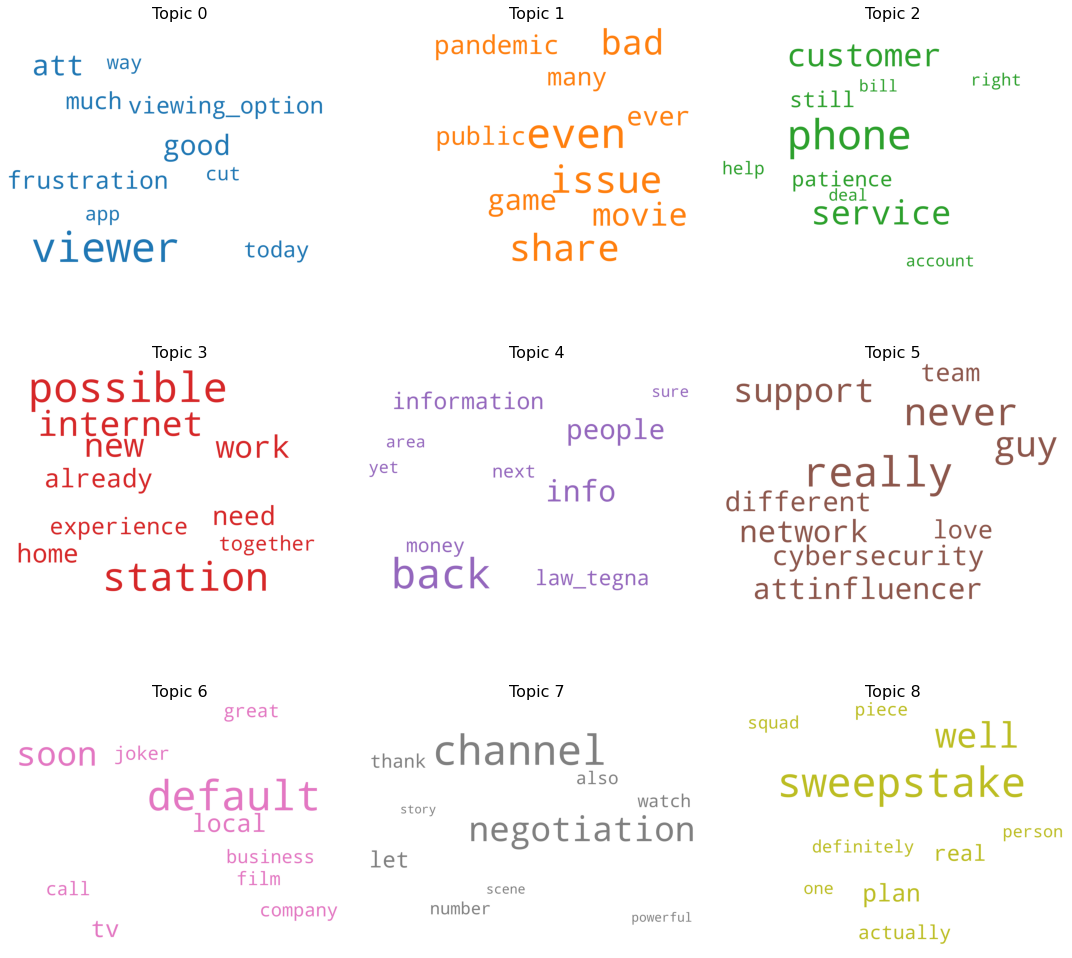

In [83]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='Set2',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = optimal_model.show_topics(num_topics=12,formatted=False)
#pprint(optimal_model.print_topics(num_words=10))
topics.sort()
#for topic in topics:
#    print(topic)
#print(topics)
fig, axes = plt.subplots(3, 3, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
#    print(i)
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [84]:
##Prediction
df_dominant_topic.head()

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index,User,Alias,Followers,Date,Tweet,Permalink,Retweet count,Likes count,Tweet value,...,Bio Location,Latitude,Longitude,Country code,Parsed location,Sentiment Score,Customer sentiment / tone,Dominant_Topic,Perc_Contribution,Topic_Keywords
0,0,Tim McCutcheon,goldenhorngate,1.0,Thu 07 Jan 2021 16:49:17 GMT,@ATTNEWS @ATT Are you going to continue to fun...,https://twitter.com/user/show/el/1347223795736...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.1440,positive,4.0,0.1994,"possible, station, internet, new, work, need, ..."
1,1,Hopefulbond,hopefulbond,131.0,Thu 07 Jan 2021 16:47:59 GMT,@ATTHelp when it’s time to pay the bill your r...,https://twitter.com/user/show/el/1347223467234...,NaN,NaN,0.08,...,NaN,NaN,NaN,NaN,NaN,0.1351,positive,3.0,0.3576,"phone, service, customer, still, patience, hel..."
2,2,Nitro,Baja9Blast,5.0,Thu 07 Jan 2021 16:47:46 GMT,@ATTHelp Could you please explain the differen...,https://twitter.com/user/show/el/1347223413199...,NaN,NaN,NaN,...,Wisconsin,NaN,NaN,NaN,NaN,0.6369,positive,8.0,0.2879,"channel, negotiation, let, thank, watch, also,..."
3,3,Allison Koons,AllisonKoons1,206.0,Thu 07 Jan 2021 16:45:57 GMT,@ATTHelp How do I order a landline? I’ve tried...,https://twitter.com/user/show/el/1347222953700...,NaN,NaN,0.14,...,NaN,NaN,NaN,NaN,NaN,0.0000,neutral,3.0,0.1755,"phone, service, customer, still, patience, hel..."
4,4,hacked at 35k 🤣,__jwash,880.0,Thu 07 Jan 2021 16:41:33 GMT,@ATT @ATTHelp I keep getting spam SMS messages...,https://twitter.com/user/show/el/1347221849269...,NaN,NaN,0.50,...,Ridgeland MS,NaN,NaN,NaN,NaN,-0.5719,negative,5.0,0.2635,"back, info, people, information, law_tegna, mo..."


In [85]:
#Save Optimal LDA model
optimal_model.save('/opt/cloudera/Code_dump/Code/Att_tweets_opitmal_lda_100k.model')

#Save Dictionary
dictionary.save('/opt/cloudera/Code_dump/Code/Att_tweets_optimal_lda_dict_100k.dic')

#save n-gram phrases
bigram_model.save('/opt/cloudera/Code_dump/Code/Att_tweets_optimal_lda_bigrams_100k')

with open("/opt/cloudera/Code_dump/Code/Att_tweets_corpus_100k.txt", "wb") as fp:
    pickle.dump(corpus, fp)

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Topic prediction using LDA model built #

In [86]:
new_text=["@Kayne_Martin @WarnerMedia @ATT @hbomax I can't wait for the release! https://t.co/1yAlCVk459",
          "@MCBaileyTX @dostert_michele @stuartpstevens @ATT @CharlesSchwab @Citibank @UPS @HawleyMO @tedcruz Mary you are right I know cynicism is the rule in business but here it is too serious: we are talking about companies that support seditious and traitors to",
          "@6LO6O6 @BatfleckMovie @jasonkilar @hbomax @WarnerMedia @ATT Thank you for writing it. We Batman fans all want the original movie made with the greatest live action Batman and Deathstroke.",
          "@congressdotgov @FCC @OSHA_DOL @USCERT_gov @FresnoCountyCA @CityofFresno @Xfinity @ATT @AppleValleyCAIRL 1/5/2021 12:41amS: Steve Chapman and Beverly Chapman PSI:  US Govt. Cyber Security Incident. Suspected Illegal surveillance of Federal Teleworker(s) h",
          "#TheSnyderVerse was able to split from DC Films Universe into HBO Max and are no longer related. The two universes would move on independently and have fewer problems.#RestoreTheSnyderVerse @ATT @WarnerMedia @hbomax @warnerbros @wbpictures"]

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [87]:
###Process the prediction text same as training phase, use training phase bigram model and dictionary

# Convert to list
tweets_new = new_text
tweets_new_proc=process_twitter_text(tweets_new)

#Remove special characters
data_new=tweets_new_proc
data_new = [text.lower() for text in data_new]
data_new = [re.sub('[^A-Za-z0-9 ]+', ' ', text) for text in data_new]
# Remove single quotes
data_new = [re.sub("\'", "", text) for text in data_new]
data_tokens_new = list(text_to_words(data_new))
data_tokens_new_nostops = remove_stopwords(data_tokens_new)
# Build Bigrams
data_tokens_new_bigrams = build_bigrams(data_tokens_new_nostops)
lemmatized_tokens_new = spacy_lemmatization(data_tokens_new_bigrams, allowed_postags=['NOUN', 'ADJ', 'ADV'])
# Remove Stop Words
data_lemmatized_new_nostop = remove_stopwords(lemmatized_tokens_new)
#Replace empty document with 'default' after performing lemmatization and stopword removal
data_lemmatized_new = [x if x != [] else ['default'] for x in data_lemmatized_new_nostop ]
# Create Corpus using Bag of words , use old dictionary
corpus_new = [dictionary.doc2bow(text) for text in data_lemmatized_new]

predict_topics_df = pd.DataFrame()
for i, row in enumerate(optimal_model[corpus_new]):
    row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
   # Get the Dominant topic, Perc Contribution and Keywords for each document
    for j, (topic_num, prop_topic) in enumerate(row):
        if j == 0: # => dominant topic
            topic_no = int(topic_num)+1
            topic_prec = round(prop_topic,4)
        else:
            break
#    print("Text:",data_new[i])
#    print("Topic:", topic_no)
#    print("Topic Percentage contribution:", topic_prec)
    predict_topics_df = predict_topics_df.append(pd.Series([tweets_new[i], topic_no, topic_prec]), ignore_index=True)
predict_topics_df.columns = ['Tweet', 'Topic', 'Topic Percentage contribution']   

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [88]:
predict_topics_df

/home/centos/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Tweet,Topic,Topic Percentage contribution
0,@Kayne_Martin @WarnerMedia @ATT @hbomax I can'...,3.0,0.1755
1,@MCBaileyTX @dostert_michele @stuartpstevens @...,7.0,0.2946
2,@6LO6O6 @BatfleckMovie @jasonkilar @hbomax @Wa...,7.0,0.2696
3,@congressdotgov @FCC @OSHA_DOL @USCERT_gov @Fr...,7.0,0.2361
4,#TheSnyderVerse was able to split from DC Film...,3.0,0.2054
